In [1]:
import pandas as pd
import networkx as nx
import powerlaw

In [2]:
from graph.read_network import generate_network

G = generate_network('../data.csv')

In [3]:
degree_centrality = nx.degree_centrality(G)

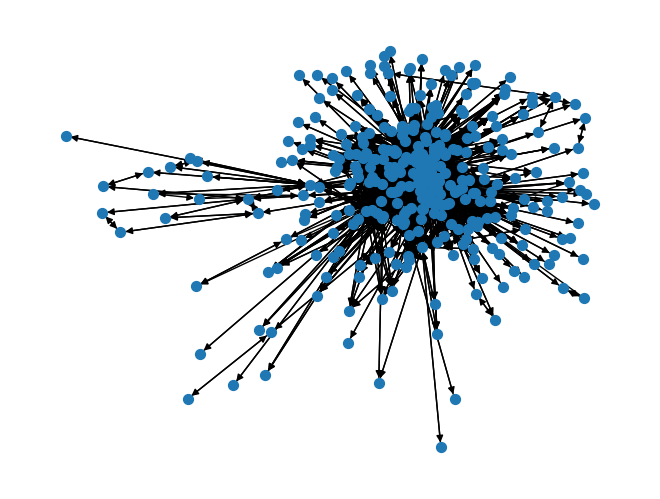

In [4]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, node_size=50, with_labels=False)
plt.show()


In [5]:
nx.write_gexf(G, 'air_transport_network.gexf')

### Number of Nodes and Edges

In [6]:
N = G.number_of_nodes()
L = G.number_of_edges()

In [7]:
print(L,N)

5535 346


### Average Degree

In [16]:
from graph import network_stats

In [17]:
average_degree = network_stats.average_degree(G)

In [18]:
print(average_degree)

31.99421965317919


### Average Squared degree in and out

In [19]:
average_squared = network_stats.average_squared_degree(G)
print(average_squared)

(991.864161849711, 989.5231213872833)


In [20]:
gamma = network_stats.gamma_values(G)
print(gamma)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
None progress: 98%


### Showing airports that flights (degrees) >= average_degree

In [ ]:
print("Average degree is {}".format(average_degree))

node_degrees = [(node, degree) for node, degree in G.degree() if degree >= average_degree]
top_node_degrees = sorted(node_degrees, key=lambda item: item[1], reverse=True)

print("Total number of nodes is {}".format(len(G.nodes())))
print("Number of top nodes is {}".format(len(top_node_degrees)))

### Printing...

In [ ]:
nodes = [node   for node, degree in top_node_degrees]
degrees = [degree for node, degree in top_node_degrees]

plt.figure(figsize=(15, 15))
plt.pie(degrees, labels=nodes, autopct='%1.0f%%')
plt.title("Most connected airports")
plt.show()

### Describing airport hubs

In [ ]:
most_connected_airport: str = top_node_degrees[0][0]

G_temp = nx.DiGraph()
G_temp.add_node(most_connected_airport)

G_temp.nodes()

for neighbor in G.neighbors(most_connected_airport):
    G_temp.add_edge(most_connected_airport, neighbor)

    if G.has_edge(neighbor, most_connected_airport):
        G_temp.add_edge(neighbor, most_connected_airport)

In [ ]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G_temp, k=0.9, seed=70) 
nx.draw(G_temp, pos, node_size=1000, with_labels=True)
plt.show()

### Generating graphic visualization for all nodes that degree >= average_degree

In [ ]:
import os

In [ ]:
need_generate_images = len(os.listdir("./hubs/images")) == 0

if (not need_generate_images):
    print("All the hubs images are generated")
else:
    for node, _ in top_node_degrees:
        G_temp = nx.DiGraph()
        G_temp.add_node(node)

        for neighbor in G.neighbors(node):
            G_temp.add_edge(node, neighbor)

            if G.has_edge(neighbor, node):
                G_temp.add_edge(neighbor, node)
        
        plt.figure(figsize=(20, 20))
        pos = nx.spring_layout(G_temp, k=0.9, seed=70) 
        nx.draw(G_temp, pos, node_size=1000, with_labels=True)
        plt.savefig("./hubs/images/{}.png".format(node))

        print("## Airport: {}".format(node))
        print("")
        print("Connections: ")
        print("")
        number_of_neighbours = len(list(G_temp.neighbors(node)))
        for i, n in enumerate(G_temp.neighbors(node)):
            if (i+1) % 4 != 0:
                if (i+1) == number_of_neighbours:
                    print("{}".format(n), end='')
                else:
                    print("{}, ".format(n), end='')
            else:
                print("{}".format(n))
        print("")
        print("![{0}](./images/{0}.png)".format(node))
        print("")